# Big Data Mart Sales Problem

## Data Set Information:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

## Importing the required libraries:

In [472]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [473]:
import pandas as pd
train_dataset = pd.read_csv('bigmart_train.csv')
test_dataset = pd.read_csv('bigmart_test.csv')

In [474]:
train_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [475]:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [476]:
train_dataset.shape

(8523, 12)

We have target variable in train dataset

In [477]:
test_dataset.shape

(5681, 11)

No target variable in test dataset

### Lets combine these datasets for data preprocessing

In [478]:
#lets make temperory column called temp which will show train and test dataset in future.
train_dataset['Temp']="Train"
test_dataset['Temp']="Test"
df = pd.concat([train_dataset,test_dataset],ignore_index=True)
df

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Temp
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.50,1997,OUT046,Tier 1,Small,Supermarket Type1,Test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.60,2009,OUT018,Tier 3,Medium,Supermarket Type2,Test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.00,2002,OUT045,Tier 2,NaN,Supermarket Type1,Test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.30,2007,OUT017,Tier 2,NaN,Supermarket Type1,Test


## EDA (Exploratory Data Analysis)

In [479]:
df.shape

(14204, 13)

Now we have 14204 rows and 13 columns

In [480]:
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Temp'],
      dtype='object')

In [481]:
df.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Temp                          object
dtype: object

Some columns are Float datatype and some are object which needs to be converted

In [482]:
#Lets chcek unique values in each columns
print(df.Item_Identifier.value_counts())

NCV06    10
FDQ04    10
FDG09    10
FDQ37    10
FDZ44    10
         ..
FDO33     7
FDL50     7
FDR51     7
NCW54     7
FDM50     7
Name: Item_Identifier, Length: 1559, dtype: int64


There are 1559 unique items in this coulmn and also it is object column, hence it can be removed

## Handing Null Values

In [483]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Temp                            0
dtype: int64

In Item_Outlet_Sales  we have 5681 null values because there was no target variable in Test data, lets leave it

Item_weight colum can be replaced with mean or meadian based on distribution

Outliet_Size column can be replaced with mode

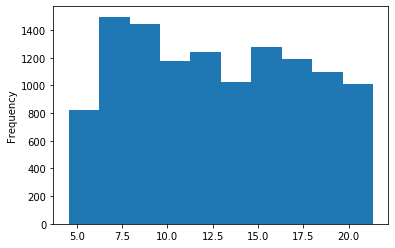

In [484]:
df.Item_Weight.plot(kind = 'hist')
plt.show()

In [485]:
#Item_Weight is float datatype, so lets replace null values with with mean since the data is normal distributed
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())


In [486]:
#Outletsize is a Object type column, so lets replace nan values with mode
x = df['Outlet_Size'].mode()
mode = x[0]
mode

'Medium'

In [487]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(mode)

In [488]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Temp                            0
dtype: int64

Now there are no null values in this dataset

### Checking for unique values

In [489]:
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Temp'],
      dtype='object')

In [490]:
#we can see that  5 values, but there are only two in factual 
pd.unique(df.Item_Fat_Content)

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Low Fat, low fat and LF are same

Regualar and  reg are same

In [491]:
#lets replace them
df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [492]:
pd.unique(df.Item_Fat_Content)

array(['Low Fat', 'Regular'], dtype=object)

Now we have only two unique values for Item_Fat_COntent column

### Removing Unnecessary Columns

In [493]:
#we can drop Item_Identifier column since is not usefull in taget value prediction, it is object dattype with 1559 unique values
x = pd.unique(df.Item_Identifier)
print(x)
len(x)

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


1559

In [494]:
#This is just like the name of the outletwhich is not useful
#we can also drop  Outlet_Identifier column since is not usefull in taget value prediction, it is object dattype with 10 unique values
x = pd.unique(df.Item_Identifier)
x = pd.unique(df.Outlet_Identifier)
print(x)
len(x)

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


10

In [495]:
#lets drop the unwanted columns
df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1,inplace =True)
df.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Temp
0,Low Fat,249.8092,3735.1380,Dairy,0.016047,9.30,1999,Tier 1,Medium,Supermarket Type1,Train
1,Regular,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,141.6180,2097.2700,Meat,0.016760,17.50,1999,Tier 1,Medium,Supermarket Type1,Train
3,Regular,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,Tier 3,Medium,Grocery Store,Train
4,Low Fat,53.8614,994.7052,Household,0.000000,8.93,1987,Tier 3,High,Supermarket Type1,Train


## Feature Engineering

#### we can use establishment year column to extract information of from how many years the outlets is Running till 2013.

In [496]:
#Also we can covert outlet establishment year to howold is outlet
df['Outlet_Establishment_Year'] = 2013- df['Outlet_Establishment_Year']


In [497]:
#Lets change the name of the column after extracting the using data
df.rename(columns = {'Outlet_Establishment_Year': 'Outlet_Age_till_2013'},inplace=True)

In [498]:
df.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Age_till_2013,Outlet_Location_Type,Outlet_Size,Outlet_Type,Temp
0,Low Fat,249.8092,3735.1380,Dairy,0.016047,9.30,14,Tier 1,Medium,Supermarket Type1,Train
1,Regular,48.2692,443.4228,Soft Drinks,0.019278,5.92,4,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,141.6180,2097.2700,Meat,0.016760,17.50,14,Tier 1,Medium,Supermarket Type1,Train
3,Regular,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,15,Tier 3,Medium,Grocery Store,Train
4,Low Fat,53.8614,994.7052,Household,0.000000,8.93,26,Tier 3,High,Supermarket Type1,Train


### Encoding the Object Datatype columns

In [499]:
df.dtypes


Item_Fat_Content         object
Item_MRP                float64
Item_Outlet_Sales       float64
Item_Type                object
Item_Visibility         float64
Item_Weight             float64
Outlet_Age_till_2013      int64
Outlet_Location_Type     object
Outlet_Size              object
Outlet_Type              object
Temp                     object
dtype: object

In [500]:
#lets use ordinal encoding 
collist = df.columns
encoding = OrdinalEncoder()

#lets exclude our last column Temp which is created check Train and test
for i in collist[:-1]:
    if df[i].dtypes == 'object':
        df[i] = encoding.fit_transform(df[i].values.reshape(-1,1))

In [501]:
#Now all the data is either int or float
df.dtypes

Item_Fat_Content        float64
Item_MRP                float64
Item_Outlet_Sales       float64
Item_Type               float64
Item_Visibility         float64
Item_Weight             float64
Outlet_Age_till_2013      int64
Outlet_Location_Type    float64
Outlet_Size             float64
Outlet_Type             float64
Temp                     object
dtype: object

Now all the columns are coverted float, except Temp column which will be removed further steps

In [502]:
df.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Age_till_2013,Outlet_Location_Type,Outlet_Size,Outlet_Type,Temp
0,0.0,249.8092,3735.1380,4.0,0.016047,9.30,14,0.0,1.0,1.0,Train
1,1.0,48.2692,443.4228,14.0,0.019278,5.92,4,2.0,1.0,2.0,Train
2,0.0,141.6180,2097.2700,10.0,0.016760,17.50,14,0.0,1.0,1.0,Train
3,1.0,182.0950,732.3800,6.0,0.000000,19.20,15,2.0,1.0,0.0,Train
4,0.0,53.8614,994.7052,9.0,0.000000,8.93,26,2.0,0.0,1.0,Train


In [503]:
#statistical summary of numerical columns
df[['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Age_till_2013']].describe()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Age_till_2013
count,14204.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,0.065953,12.792854,15.169319
std,62.086938,0.051459,4.234226,8.371664
min,31.290000,0.000000,4.555000,4.000000
25%,94.012000,0.027036,9.300000,9.000000
50%,142.247000,0.054021,12.792854,14.000000
75%,185.855600,0.094037,16.000000,26.000000
max,266.888400,0.328391,21.350000,28.000000


### Insight Obtained from this Table :

Item weight columns is having lot of difference between 75th percentile and max, so there are outliers below lower whisker in all colmumns

Mean and median are almost same all column,so the data might be normal distributed

There are no null values in any columns

In [504]:
df[['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Age_till_2013']].skew()

Item_MRP                0.130728
Item_Visibility         1.195175
Item_Weight             0.111314
Outlet_Age_till_2013    0.396465
dtype: float64

Item_Visibility is not in skewness range -0.5 to +0.5

In [505]:
corr_matrix  = df[['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Age_till_2013','Item_Outlet_Sales']].corr()
corr_matrix

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Age_till_2013,Item_Outlet_Sales
Item_MRP,1.000000,-0.006351,0.033002,-0.000141,0.567574
Item_Visibility,-0.006351,1.000000,-0.013641,0.083678,-0.128625
Item_Weight,0.033002,-0.013641,1.000000,-0.000462,0.011083
Outlet_Age_till_2013,-0.000141,0.083678,-0.000462,1.000000,0.049135
Item_Outlet_Sales,0.567574,-0.128625,0.011083,0.049135,1.000000


item_mrp is having good positive correlation with target column

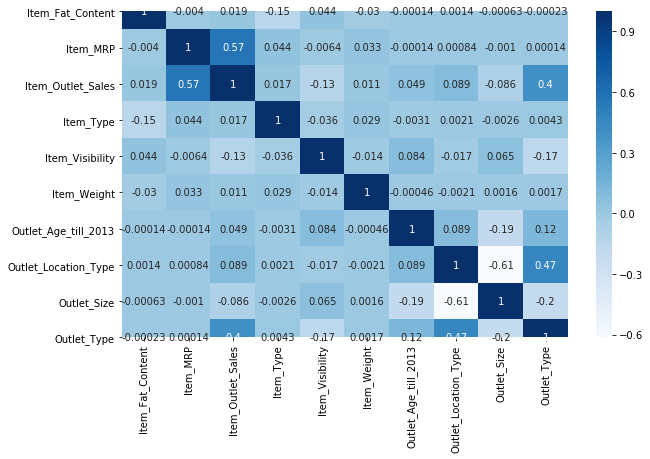

In [506]:
#correlation
fig = plt.figure(figsize=(10,6))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [507]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales       1.000000
Item_MRP                0.567574
Outlet_Type             0.401522
Outlet_Location_Type    0.089367
Outlet_Age_till_2013    0.049135
Item_Fat_Content        0.018719
Item_Type               0.017048
Item_Weight             0.011083
Outlet_Size            -0.086182
Item_Visibility        -0.128625
Name: Item_Outlet_Sales, dtype: float64

Item_MRP  is having highest positive correlation with target variable

## Data PreProcessing

### Outlier Removal :

In [508]:
df.columns

Index(['Item_Fat_Content', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Age_till_2013',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Temp'],
      dtype='object')

In [509]:
Numerical_columns = ['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Age_till_2013']

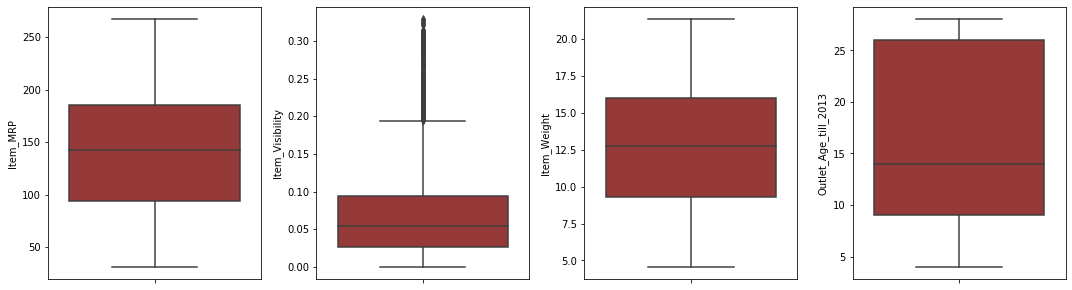

In [510]:
#outliers using box plot
# lets check for outliers among all the columns
collist = Numerical_columns
ncol = 4
nrows = 5
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='brown',orient = 'v')
    plt.tight_layout()

Only Item Visibility column is having outliers 

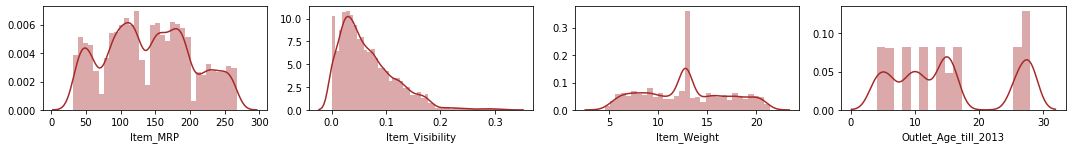

In [511]:
# Lets check the distribution
collist = Numerical_columns
ncol = 4
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='brown')
    plt.tight_layout()

Item visbility column is Right skewed

In [512]:
df.skew()

Item_Fat_Content        0.613645
Item_MRP                0.130728
Item_Outlet_Sales       1.177531
Item_Type               0.099574
Item_Visibility         1.195175
Item_Weight             0.111314
Outlet_Age_till_2013    0.396465
Outlet_Location_Type   -0.209053
Outlet_Size            -0.087077
Outlet_Type             0.927344
dtype: float64

In [513]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 3)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 3)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [514]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [515]:
z = np.abs(zscore(df[Numerical_columns]))
df_new  = df[(z<3).all(axis=1)]
df_new.shape

(14031, 11)

In [516]:
df.shape

(14204, 11)

Data Loss is very less

### Skewness Reduction

In [517]:
#lets devide X and Y before handing skewness
Y = df_new['Item_Outlet_Sales']
X = df_new.drop('Item_Outlet_Sales',axis = 1)

In [518]:
X[Numerical_columns].skew()

Item_MRP                0.130743
Item_Visibility         0.796921
Item_Weight             0.110310
Outlet_Age_till_2013    0.409922
dtype: float64

In [519]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = Numerical_columns
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X.skew()

Item_Fat_Content        0.618503
Item_MRP                0.130743
Item_Type               0.097428
Item_Visibility         0.111719
Item_Weight             0.110310
Outlet_Age_till_2013    0.409922
Outlet_Location_Type   -0.213255
Outlet_Size            -0.082716
Outlet_Type             0.948947
dtype: float64

Skewness is in range for all numerical Columns

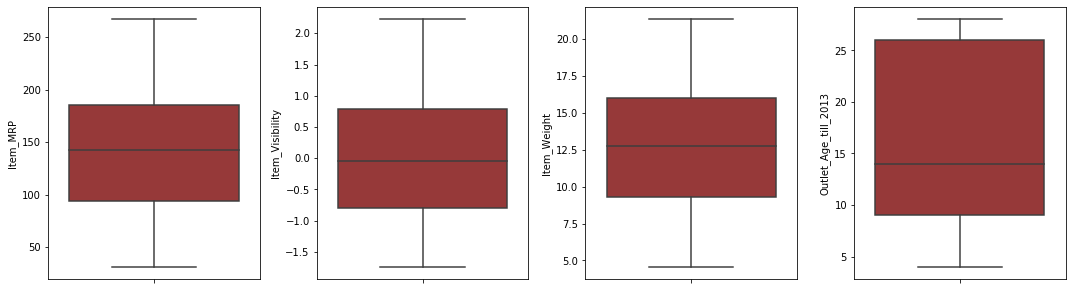

In [520]:
#Now lets check for outliers after data preprocessing
nrows = 5
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='brown',orient = 'v')
    plt.tight_layout()

We can see there are no outliers in any  Numerical columns, All the other columns are transformed with encoding

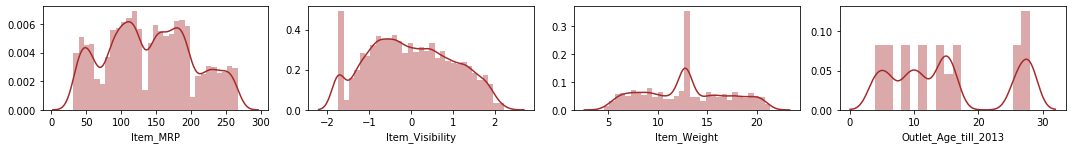

In [521]:
# Lets check the distribution after data preprocessing
collist = Numerical_columns
ncol = 4
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(X[collist[i]],color='brown')
    plt.tight_layout()

We can see every column is normal distributed in any  Numerical columns, All the other columns are transformed with encoding

Data Preprocessing is Done

## Let split our data

In [522]:
#Lets get out Original Train and Test Dataset provided in the project
X_train_original = X.loc[df["Temp"] == "Train"]
X_test_original = X.loc[df["Temp"]=="Test"]
#X_train_original.reset_index(drop =True, inplace=True)
#X_test_original.reset_index(drop = True, inplace=True)

In [523]:
#lets drop the null values in the Y column
Y.dropna(inplace=True)
Y.shape

(8428,)

In [524]:
#Original X_train dataset
X_train_original.shape

(8428, 10)

In [525]:
#Original X_test dataset
X_test_original.shape

(5603, 10)

In [526]:
#no null values in this series
Y.isnull().sum()

0

In [527]:
# Original X train column from 0th row to 8422th row
X_train_original.drop('Temp',axis = 1,inplace  =True)

In [528]:
# Original X test column from 8523rd row to 14203rd row
X_test_original.drop('Temp',axis = 1,inplace  =True)

In [529]:
#lets Ignore thos index now
X_train_original.reset_index(drop =True, inplace=True)
X_test_original.reset_index(drop = True, inplace=True)

### We have provided with X_test data, but Y_test (Label) is not provided

So lets use our X_train_original and Y_train_Original  as X and Y for model selection

## Best random state

In [530]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 

Best r2 score is 0.548266835984361 on random state 115


In [531]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 115


In [532]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= 115 )

## Model selection :

In [533]:
#lets Choose Among this Five Models
lr = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [534]:
#checking each model with Cross val score
model_list = [lr,knn,svr,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X_train_original,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.sqrt(r2_score(y_test,pred))-cvs.mean()
    print('Diffrence between cross val score and root mean squared error is :',difference)
    least_difference.append((m,difference))



LinearRegression()
Scores :
r2 score: 0.548266835984361
Cross Val score : 0.5028509968868712
Error :
mean absolute error : 896.2920140132283
mean squared error :  1438178.4525381764
root mean squared error : 1199.2407817190742
Difference :
Diffrence between cross val score and root mean squared error is : 0.23759943088284863


KNeighborsRegressor()
Scores :
r2 score: 0.4769927083932535
Cross Val score : 0.3920117970008836
Error :
mean absolute error : 933.8869721832883
mean squared error :  1665093.1948913387
root mean squared error : 1290.384901837951
Difference :
Diffrence between cross val score and root mean squared error is : 0.2986347901862634


SVR()
Scores :
r2 score: 0.18315712480556323
Cross Val score : 0.1928333426441407
Error :
mean absolute error : 1174.9768164897202
mean squared error :  2600574.6661834624
root mean squared error : 1612.6297362331698
Difference :
Diffrence between cross val score and root mean squared error is : 0.23513525994904394


RandomForestRegress

In [535]:
least_difference

[(LinearRegression(), 0.23759943088284863),
 (KNeighborsRegressor(), 0.2986347901862634),
 (SVR(), 0.23513525994904394),
 (RandomForestRegressor(), 0.2340087611560121),
 (AdaBoostRegressor(), 0.28205510355678587)]

Lets choose our final model as Rabdom Forest Regressor, because it is having least diferrence

## Hyper Parameter Tuning

In [536]:
#lets use random forest regressor
parameters = {'n_estimators' : [100,200,300,400,500,600,700,800],'criterion':['mse','mae'],'max_depth':[3,4,5,6,7,8,10,25],
             'min_samples_split':[2,5,8,10,12,18],'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,6,7]}
gsvrf = RandomizedSearchCV(rf, parameters, cv=5,scoring="r2")
gsvrf.fit(x_train,y_train)
gsvrf.best_score_

default values is only giving better r2 score, so lets choose default values

## Creating a Final Model as Random Forest:

In [537]:
final_mod = RandomForestRegressor()
final_mod.fit(x_train,y_train)
final_pred = final_mod.predict(x_test)
cvs = cross_val_score(m,X_train_original,Y,cv =5)
print('Score')
print('R2_score :',r2_score(y_test,final_pred))
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))

Score
R2_score : 0.5972022531692986


Error :
mean absolute error : 800.8537003040432
mean squared error :  1282383.243845225


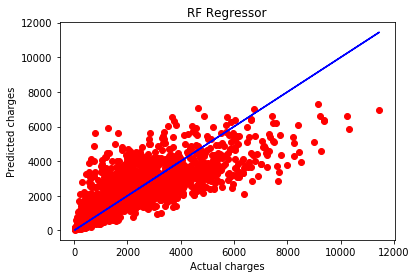

In [538]:
plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = final_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('RF Regressor')
plt.show()

Our data is very much spreded , so we are getting r2 score of only 60%

## Now Lets Predict Our Original X_test_original

In [539]:
final_mod.fit(x_train,y_train)
final_pred = final_mod.predict(X_test_original)
print(final_pred)

[1736.200002 1319.342622  782.128576 ... 1800.616152 4772.494348
 1621.309554]


We don't have Original values for Y_test Predict the R2_score , meansquared error and absolute error